# 💠 Distribuições de probabilidade

##  ✴️ Distribuição normal

###  🔹 Introdução

A distribuição normal é uma das mais utilizadas em estatística. É uma distribuição contínua, onde a distribuição de frequências de uma variável quantitativa apresenta a forma de sino e é simétrica em relação a sua média.

<img src='https://aprenderdatascience.com/wp-content/uploads/2020/08/imag2.png' style='float:left' width=600>

Parte de uma boa análise exploratória de dados é saber o tipo de distribuição que uma variável possui. Para então poder então escolher os métodos mais adequados para analisarmos nossa variável. Por exemplo:<br><br>

> Se nossa variável possui uma distribuição normal, devemos analisa-la através dos testes paramétricos:
> - **Teste T**
> - **Tukey**
> - **ANOVA**
> - **Teste de correlação de Pearson**
> - **etc** 


>Já se nossa variável não possuir uma distribuição normal, devemos analisa-la através dos testes não paramétricos:
> - **Teste de correlação de Spearman**
> - **Teste de correlação de Kendall**
> - **Wilcoxon ou Mann-Whitney**
> - **Kruskal Wallis**
> - **etc**

<br>

###  🔹 Propriedades de uma distribuição normal

Quanto maior for a quantidade de dados, maior a tendência de termos uma distribuição normal. No mundo temos muitos fenômenos aleatórios que tem um comportamento de uma distribuição normal, como por exemplo, a altura ou o peso das pessoas. Algumas características dessa distribuição são:

1. É simétrica em torno da média;

2. A área sob a curva corresponde à proporção 1 ou 100%;

3. As medidas de tendência central (média, mediana e moda) apresentam o mesmo valor;

4. Os extremos da curva tendem ao infinito em ambas as direções e, teoricamente, jamais tocam o eixo $x$;

5. O desvio padrão define o achatamento e largura da distribuição. Curvas mais largas e mais achatadas apresentam valores maiores de desvio padrão;

6. A distribuição é definida por sua média e desvio padrão;

7. A probabilidade sempre será igual à área sob a curva, delimitada pelos limites inferior e superior.

<img src='https://www.inf.ufsc.br/~andre.zibetti/probabilidade/figures/normal.PNG' style='float:left' width='590'>

###  🔹 Formula de densidade de probabilidade

$$f(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Onde:

$x$ = variável normal

$\sigma$ = desvio padrão

$\mu$ = média

###  🔹 Como saber se uma variável tem distribuição normal?

Declarar se uma váriável possui uma distribuição normal não é tão simples, por isso devemos utilizar vários métodos que nos levarão a essa conclusão. Os métodos que vamos ver nesse tutorial são  Histograma, Boxplot, Quantil-Quantil Plot, testes de Shapiro-Wilk, Kolmogorov Smirnov(Lilliefors) e Anderson-Darling.

#### Importando as libs e o dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors as lillie
sns.set()

In [83]:
df = pd.read_csv('base-de-dados/dados.csv')

#### Histograma

Com base no que aprendemos sobre o histograma iremos analisar a variável **Altura** com o intuito de descobrir se as caracteristicas de uma distribuição normal se aplicam a essa variável.

Text(0, 0.5, 'Quantidade')

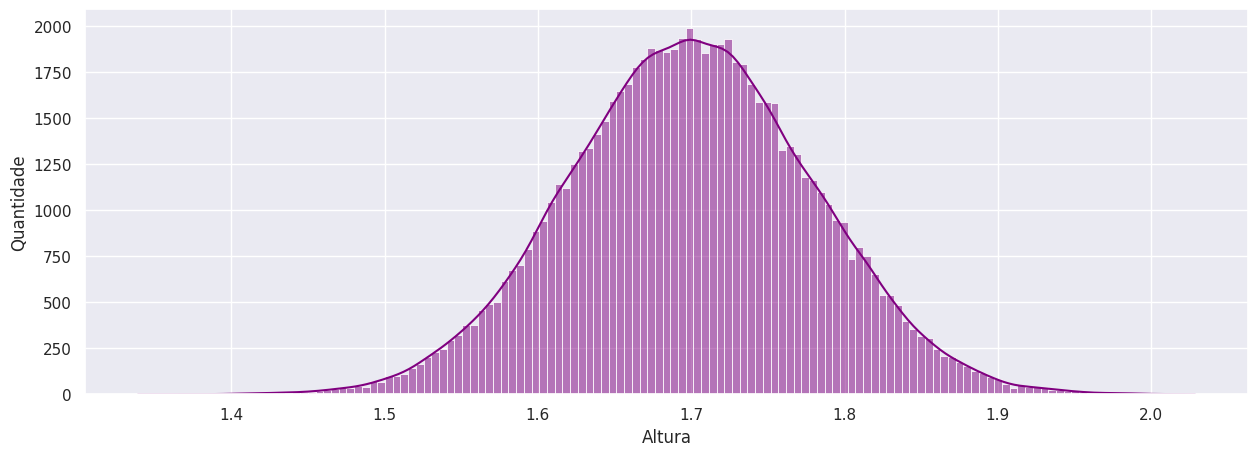

In [14]:
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x='Altura', kde=True, color='purple')
plt.ylabel('Quantidade')

Agora vamos descobrir se a média, moda e median são iguais ou bem próximas.

In [14]:
print(df['Altura'].mode().mean())
print(df['Altura'].median())
print(df['Altura'].mean())

1.7066552394444445
1.6993247325
1.6995124540575741


**OBS:**

- Podemos observar que a distirbuição não é unimodal, no entanto a média das modas é praticamente igual a mediana e a média da variável Altura.
- A distribuição pussui um formato de sino, caracteristica essa de uma distribuição normal como vimos.
- A distribuição é quase 100% simétrica.

Com base no que aprendemos sobre que é uma distribuição normal e quais as suas principais caracteristicas nós podemos dizer que temos uma distribuição normal. No entanto vamos usar os outros métodos para poder ter certeza.

#### Boxplot

Um boxplot nada mais é que um Histograma visto de cima. No entanto, um boxplot nos dá mais informações sobre a distribuição dos dados.

<AxesSubplot: title={'center': 'BOXPLOT DOS VALORES DA ALTURA'}, xlabel='Altura'>

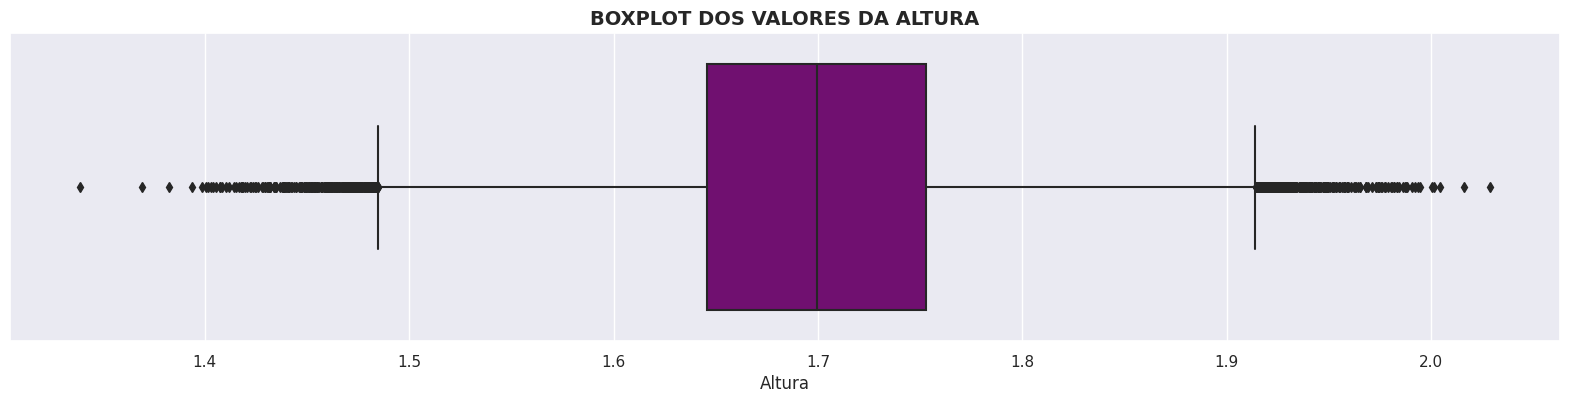

In [7]:
plt.figure(figsize=(20,4))
plt.title('BOXPLOT DOS VALORES DA ALTURA', fontsize=14, fontweight='bold')
sns.boxplot(x='Altura', data=df, color='purple')

**OBS:**
- Uma distribuição representada por um boxplot tem sua caixa muito proximo ao centro e é o que vemos no nosso boxplot.
- Podemos observar também que existe uma simetria quase que perfeita ao comparar o primeiro lado do gráfico (o lado antes da mediana) com o segundo lado do gráfico (o lado após a mediana).

Esse gráfico só fortalece o que já descobrimos através do histograma.

#### QQ Plot

O QQ-plot é uma ferramenta gráfica que dentre suas funções ele nos auxilia na verificação de uma distribuição normal. É mais eficiente que o BoxPlot e o Histograma. O QQ-Plot faz uma comparação entre quantis teóricos de uma distribuição normal e os quantis da nossa variável. 

Text(0.5, 1.0, 'NORMAL QQ PLOT')

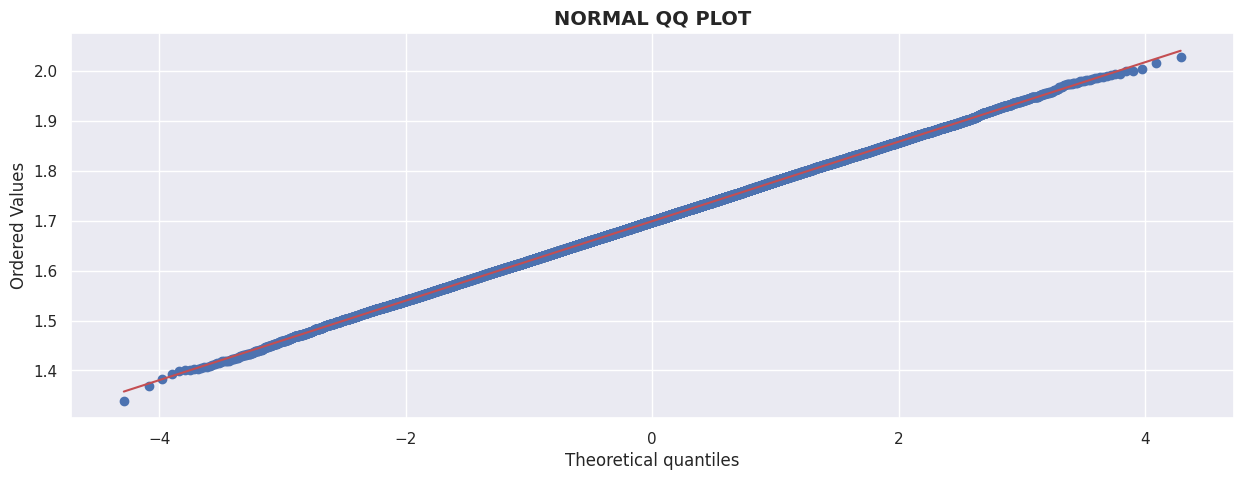

In [18]:
# Criando um qq-plot
plt.figure(figsize=(15,5))
stats.probplot(df['Altura'], dist='norm', plot=plt)
plt.title('NORMAL QQ PLOT', fontsize=14, fontweight='bold')

A reta vermelha representa como os nossos dados deveriam estar distribuidos caso nossa variável possuisse uma distribuição normal. Os pontos em azul demonstram como a nossa variável realmente está distribuida. Ou seja, quanto mais próximo os pontos em azul estiverem da linha vermelha maior será a chance da nossa variável pussuir uma distribuição normal.

<br>

**OBS:**
- No gráfico acima é possivel notar que a nossa variável praticamente tem uma distribuição normal. Apenas os pontos extremos apresentam uma pequena distância da linha vermelha.

#### Shapiro-Wilk

Seguindo adiante vamos utilizar o teste statistico Shapiro-wilk para poder descobrir a normalidade de uma distribuição. Esse método nos retorna dois valores, o resultado do cáculo do shapiro-wilk e o p-valor. Vamos utilizar o pvalue para validar uma das hipoteses abaixo:

Ho = distribuição normal se p>0.05<br>
Ha = distribuição não normal se p<=0.05

In [102]:
statistica, pvalue = stats.shapiro(df['Altura'])

print(pvalue)

0.6376791596412659


/home/audax/Projetos/estudo/venv-estudo/lib64/python3.11/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**OBS:**
- Podemos perceber que esse teste não é tão preciso para conjuntos de dados que possuem mais de 5000 mil dados.
- O pvalue é maior do que 0.05, o que nos indica que provavelmente essa distribuição é normal. 

#### kolmogorov smirnov

O método kolmogorov smirnov é mais um utilizado para saber se uma distribuição é ou não normal. O mesmo raciocinio das hipoteses se aplica nesse método. <br>

Vamos utilizar o pvalue para validar uma das hipoteses abaixo:

Ho = distribuição normal se p>0.05<br>
Ha = distribuição não normal se p<=0.05


In [103]:
statistica, pvalue = lillie(df['Altura'], dist='norm')

print(pvalue)

0.36570836798072737


**OBS:**
- O pvalue é maior do que 0.05, o que nos indica que provavelmente essa distribuição é normal. 

#### Resumo

Depois de passar por todas essas formas de testar se uma distribuição é ou não normal, vemos que em todos as formar utilizadas a variável altura foi considerada normal, logo podemos concluir que realmente essa variável possui uma distribuição normal.

### 🔹 Valor $z$

**Valores z** são uma forma de medir a distância entre um valor específico e a **média** da variável que se está estudando. Imagine que você tem uma variável chamada "nota" e você quer comparar a nota de um aluno com a média das notas de toda a turma. A forma de comparar essa nota individual com a média geral da turma é transformando essa nota em um **valor z**.

$$Z = \frac{x-\mu}{\sigma}$$

Para calcular o **valor z** de uma nota, você **subtrai** a nota do aluno da **média** das notas da turma e divide o resultado pelo **desvio padrão** das notas. **O resultado** é um número que indica quantos **desvios padrões** a nota do aluno está **acima ou abaixo da média** da turma. Um **valor z** positivo indica que a nota do aluno é maior do que a média da turma, enquanto um valor z negativo indica que a nota do aluno é menor do que a média da turma. **Quanto mais próximo de zero for o valor z, mais próximo da média a nota do aluno está**.

Valores z são úteis para comparar valores entre diferentes conjuntos de dados ou entre diferentes populações, independentemente do tamanho ou da escala dos dados. Eles também são úteis para identificar valores extremos ou outliers e para calcular probabilidades usando tabelas de distribuição normal.

- **Comparar valores entre diferentes conjuntos de dados ou entre diferentes populações**: Imagine que você tem dois conjuntos de dados de notas de alunos, um de uma escola particular e outro de uma escola pública. Você pode calcular a média e o desvio padrão das notas para cada conjunto de dados e, em seguida, calcular os valores z para as notas de cada aluno. Isso permite comparar as notas de alunos de escolas diferentes, independentemente do tamanho ou da escala dos dados.

- **Identificar valores extremos ou outliers**: Imagine que você tem um conjunto de dados de alturas de pessoas e você quer identificar quais alturas estão fora da distribuição normal. Tendo a média e o desvio padrão das alturas você pode calcular os valores z para cada altura. Valores z positivo ou negativo muito altos podem indicar outliers ou valores extremos.

- **Calcular probabilidades usando tabelas de distribuição normal**: Imagine que você tem um conjunto de dados de notas de alunos e você quer calcular a probabilidade de um aluno ter uma nota acima de 80. Tendo a média e o desvio padrão desse conjunto você consegue calcular o valor z e em seguida, consultar uma tabela de distribuição normal para encontrar a probabilidade de um valor z acima de 80. Essa probabilidade representa a probabilidade de um aluno ter uma nota acima de 80. Ou você pode simplismente utilizar as propriedades de uma distribuição normal para calcular a probabilidade. Ou seja, a propriedade que informa quantos % dos dados se encontram num intervalo de **μ - n.σ ** e **μ + n.σ**.

### 🔹 Tabela normal padronizada

As tabelas padronizadas foram criadas para facilitar a obtenção dos valores das áreas sob a curva normal e eliminar a necessidade de solucionar integrais definidas. Para consultarmos os valores em uma tabela padronizada basta transformarmos nossa variável em uma variável padronizada $Z$.

Vamos construir a nossa tabela padronizada usando o pandas, numpy e o scipy.

In [26]:
import pandas as pd
import numpy as np
from scipy.stats import norm

tabela_normal_padronizada = pd.DataFrame(
    data=[], 
    index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
    columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])

for index in tabela_normal_padronizada.index:
    for column in tabela_normal_padronizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabela_normal_padronizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabela_normal_padronizada.rename_axis('Z', axis = 'columns', inplace = True)
tabela_normal_padronizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


### 🔹 Exercicio de distribuição normal

Em um estudo sobre as alturas dos moradores de uma cidade verificou-se que o conjunto de dados segue uma **distribuição aproximadamente normal**, com **média 1,70** e **desvio padrão de 0,1**. Com estas informações obtenha o seguinte conjunto de probabilidades:

- **A)** probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros.

- **B)** probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60 metros e 1,80 metros.    

- **C)** probabilidade de uma pessoa, selecionada ao acaso, ter mais de 1,90 metros.

#### Resposta da letra A

Primeiramente devemos padronizar a nossa variavel x = 1.80 utilizando a formula do valor $Z$.

In [96]:
dp = 1.70
media = 0.1
x = 1.80

Z = (x - media) / dp
print('O valor Z é', Z)

O valor Z é 1.0



#### Solução manual

Agora que temos o valor **Z** vamos utilizar a tabela normal padronizada para calcular a resposta.

In [107]:
prob = 0.8413
print(f'A probabilidade de uma pessoa ser selecionada ao acaso e ter menos de 1.80M é {round(float(prob)*100, 2)}%')

A probabilidade de uma pessoa ser selecionada ao acaso e ter menos de 1.80M é 84.13%



#### Solução utilizando o scipy

In [60]:
from scipy.stats import norm

prob = norm.cdf(Z)
print(f'A probabilidade de uma pessoa ser selecionada ao acaso e ter menos de 1.80M é {round(float(prob)*100, 2)}%')

A probabilidade de uma pessoa ser selecionada ao acaso e ter menos de 1.80M é 84.13%


#### Resposta da letra B

Nessa questão nós devemos padronizar a nossas duas variavel $x = 1.80$ e $y = 1.60$ utilizando a formula do valor $Z$.

In [113]:
dp = 0.1
media = 1.7
x = 1.80
y = 1.60

Z1 = (x - media) / dp
Z2 = (y - media) / dp
print(f'valor de Z1: {Z1}')
print(f'valor de Z2: {Z2}')

valor de Z1: 1.0000000000000009
valor de Z2: -0.9999999999999987



#### Solução usando o scipy

In [114]:
prob = norm.cdf(Z1) - norm.cdf(Z2)
print(f'A probabilidade é {round(float(prob)*100, 2)}%')

A probabilidade é 68.27%


#### Resposta da letra C

Calculando o valor para o x = 1.90

In [116]:
dp = 0.1
media = 1.7
x = 1.90

Z = (x - media) / dp
print(f'O valor Z é {Z:.2f}')

O valor Z é 2.00



#### Solução usando o scipy

In [117]:
prob = 1 - norm.cdf(Z)
print(f'A probabilidade é {round(float(prob)*100, 2)}%')

A probabilidade é 2.28%


##  ✴️ Distribuição binomial

###  🔹 Introdução

Uma distribuição binomial é caracterizado pela ocorrência de apenas duas categorias. Estas categorias somadas representam todo o espaço amostral, sendo também mutuamente excludentes, ou seja, a ocorrência de uma implica na não ocorrência da outra. **Em análises estatísticas o uso mais comum da distribuição binomial é na solução de problemas que envolve situações de sucesso ou fracasso.** A formula da distribuição binomial é:

$$P(k)=\binom{n}{k} p^k q^{n-k}$$

Onde:

$p$ = probabilidade de sucesso<br>
$q$ = $(1 - p)$ = probabilidade do fracasso<br>
$n$ = numero de eventos estudados<br>
$k$ = numero de eventos desejados que tenha sucesso

<br> 

###  🔹 Propriedades de um experimento binomial

1. Realização de $n$ ensaios identicos.
2. Os ensaios são independentes.
3. Somente 2 categorias de resultados são possiveis, por exemplo: Cara ou coroa, sucesso ou fracasso. Não necessariamente cada categoria tem que ser unica, por exemplo, a possibilidade de sair cara ou coroa ao jogar um dado pode ser considerado um exeperimento binomial, pois queremos prever a probabilidade de sair ou cara ou coroa $k$ vezes jogando o dado $n$ vezes, perceba que existem 3 possibilidades de sair um numero par e também  possibilidades de sair um numero ímpar.
4. A probabilidade de sucesso é representado por $p$ e a de fracasso por $q = (1 - p)$. Essas probabilidades não se modificam de ensaio para ensaio.

<br> 

###  🔹 Media e DP de uma distribuição binomial


#### Media

O valor esperado ou a média da distribuição binomial é igual ao numero de experimentos realizados multiplicados pela chance da ocorrencia do evento.

$$\mu = n \times p$$


#### Desvio padrão

O desvio padrão é a raiz quadrada do produto entre o numero de experimentos, a probabilidade do sucesso e a probabilidade do fracasso.

$$\sigma = \sqrt{n \times p \times q}$$

<br> 

###  🔹 Exercicio de distribuição binomial

Em um concurso para preencher uma vaga de cientista de dados temos um total de **10 questões** de múltipla escolha com **3 alternativas possíveis** em cada questão. **Cada questão tem o mesmo valor.** Suponha que um candidato resolva se aventurar sem ter estudado absolutamente nada. Ele resolve fazer a prova de olhos vendados e chutar todas as resposta. Assumindo que a prova **vale 10 pontos e a nota de corte seja 5**, obtenha a probabilidade deste candidato **acertar 5 questões** e também a probabilidade deste candidato **passar para a próxima etapa do processo seletivo**.


#### Formula

$$P(k)=\binom{n}{k} p^k q^{n-k}$$


#### Solução manual

In [4]:
from scipy.special import comb

n = 10
k = 5 
p = 1/3
q = 2/3

In [13]:
# Pergunta 1
resposta = comb(n, k) * (p**k) * (q**(n-k))
print(f'A probabilidade desse candidato acertar exatamente 5 questões é {(resposta*100):.3f}%')

A probabilidade desse candidato acertar exatamente 5 questões é 13.656%


In [18]:
# Pergunta 2
respostas2 = [comb(n, k) * (p**k) * (q**(n-k)) for k in range(5, 11)]
resposta2 = sum(respostas2)
print(f'A probabilidade desse candidato passar para a próxima etapa do processo seletivo é {(resposta2*100):.3f}%')

A probabilidade desse candidato passar para a próxima etapa do processo seletivo é 21.313%


<br>

---

<br>


#### Solução usando o scipy 
[link do metodo binom](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html)

In [20]:
from scipy.stats import binom

n = 10
k = 5 
p = 1/3

In [21]:
# Pergunta 1
resposta = binom.pmf(k, n, p)
print(f'A probabilidade desse candidato acertar exatamente 5 questões é {(resposta*100):.3f}%')

A probabilidade desse candidato acertar exatamente 5 questões é 13.656%


In [22]:
# Pergunta 2 
resposta2 = binom.sf(4, n, p) 
print(f'A probabilidade desse candidato passar para a próxima etapa do processo seletivo é {(resposta2*100):.3f}%')

A probabilidade desse candidato passar para a próxima etapa do processo seletivo é 21.313%


<br> 

###  🔹 Exercicio sobre a media de uma distribuição binomial

Uma cidade do interior realiza todos os anos uma gincana para arrecadar fundos para o hospital da cidade. Na última gincana se sabe que a **proporção de participantes do sexo feminino foi de 60%**. **O total de equipes, com 12 integrantes, inscritas na gincana deste ano é de 30**. Com as informações acima responda: Quantas equipes deverão ser formadas por **8 mulheres**?


#### Solução

In [35]:
from scipy.stats import binom

k = 8
n = 12
p = 0.6

prob = binom.pmf(k, n, p)
print(f'A probababilidade de um time possuir 8 mulheres é de {(prob*100):.5f}')

A probababilidade de um time possuir 8 mulheres é de 21.28409


In [39]:
resposta = 30 * prob
print(f'A probabalidiade é que {(resposta):.5f}% das esquipes sejam formadas por 8 mulheres')

A probabalidiade é que 6.38523% das esquipes sejam formadas por 8 mulheres


<br> 

##  ✴️ Distribuição de poisson

###  🔹 Introdução

É empregada para descrever o numero de ocorrências em um intervalo de tempo ou espaço específico. Os eventos são caracterizados pela possibilidade de contagem dos sucessos, mas a não possibilidade de contagem dos fracassos.

Como exemplos de processos onde podemos aplicar a distribuição de Poisso temos, a determinação do numero de clientes que entram em uma loja em determinada hora, o numero de carros que chegam em um drive-thru de uma lanchonete na hora do almoço, a determinação do numero de acidentes registrados em um trecho da estrada, etc.

$$P(k) = \frac{e^{-\mu}(\mu)^k}{k!}$$

$e$ = número de Euler<br>
$\mu$ = representa o número médio de ocorrências em um determinado intervalo de tempo ou espaço<br>
$k$ = numero de sucessos no intervalo desejado

###  🔹 Propriedades de um experimento poisson

1. A probabilidade de uma ocorrência é a mesma em todo o espaço observado.
2. O número de ocorrências em determinado intervalo é independente do número de ocorrências em outros intervalos.
3. A probabilidade é a mesma em intervalos de igual comprimento.

###  🔹 Media e DP de uma distribuição poisson


### Média
### $\mu$


### DP  
### $\sigma = \sqrt{\mu}$

###  🔹 Exercicio de distribuição poisson

Um restaurante recebe em média **20 pedidos por hora**. Qual a chance de que, em determinada hora escolhida ao acaso, o restaurante receba **15 pedidos**?


### Formula


# $$P(k) = \frac{e^{-\mu}(\mu)^k}{k!}$$


### Solução manual

In [11]:
import numpy as np

e = np.e
media = 20
k = 15

In [15]:
# Resposta
prob = ((e**(-media)) * (media**k)) / np.math.factorial(k)
print(f'A probabilidade é {(prob*100):.3f}%')

A probabilidade é 5.165%


---


### Solução usando o scipy

In [16]:
from scipy.stats import poisson
import numpy as np

e = np.e
media = 20
k = 15

In [18]:
# Resposta
prob = poisson.pmf(k, media)
print(f'A probabilidade é {(prob*100):.3f}%')

A probabilidade é 5.165%


In [21]:
poisson.pmf(25, 20)*100

4.458764910826764

# 💠 Estimação

É a forma de se fazer suposições generalizadas sobre os parâmetros de uma população tendo como base as informações de uma amostra.

- **Parâmetros** são os atributos numéricos de uma população, tal como a média, desvio padrão etc.

- **Estimativa** é o valor obtido para determinado parâmetro a partir dos dados de uma amostra da população.

##  ✴️ Teorema do limite central

O **teorema do limite central** afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual a média da população e o desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para **n** maior ou igual a **30**.

$$ \sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

O desvio padrão das médias amostrais é conhecido como **erro padrão da média**.

###  🔹 Entendendo o Teorema do limite central

In [1]:
import pandas as pd

data = pd.read_csv('base-de-dados/dados.csv')

In [3]:
n = 2000
total_amostras = 1500
amostras = pd.DataFrame()

In [24]:
for vez in range(total_amostras):
    amostras[f'amostra_{vez}'] = data.Renda.sample(n, ignore_index=True).copy()

In [25]:
amostras

,amostra_0,amostra_1,amostra_2,amostra_3,amostra_4,amostra_5,amostra_6,amostra_7,amostra_8,amostra_9,...,amostra_1490,amostra_1491,amostra_1492,amostra_1493,amostra_1494,amostra_1495,amostra_1496,amostra_1497,amostra_1498,amostra_1499
0,1200,700,4000,4000,788,700,788,900,1400,300,...,0,788,200,2500,2500,0,1500,1700,1500,1200
1,818,1608,789,1300,1200,1900,1600,2600,240,1600,...,110,1200,1500,0,2000,800,2400,788,788,90
2,3500,1500,3200,8000,5000,1000,1600,700,4000,2000,...,1000,800,800,2000,280,200,1500,2800,130,450
3,3240,2000,2600,1000,0,12000,2000,1500,2300,500,...,1500,789,1700,2000,1200,6000,788,400,3500,1100
4,1500,1100,788,950,800,400,600,800,2000,500,...,1200,3000,200,2300,788,2000,1200,1000,7000,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4000,2500,789,3500,1200,950,1500,2500,500,5000,...,500,788,1500,1090,0,600,788,800,788,800
1996,788,2600,1200,600,3800,2000,1000,100,1100,5000,...,1500,800,20000,1500,600,100,788,6000,800,3000
1997,3000,1500,1800,1400,2400,788,400,2000,2500,200,...,0,1300,788,1900,2400,150,100,788,5500,40
1998,1500,788,1500,6000,2300,2800,28000,1800,3500,6230,...,2150,780,700,2600,0,700,3000,3000,1500,6300


"O Teorema do Limite Central afirma que, **com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal**"

<AxesSubplot: >

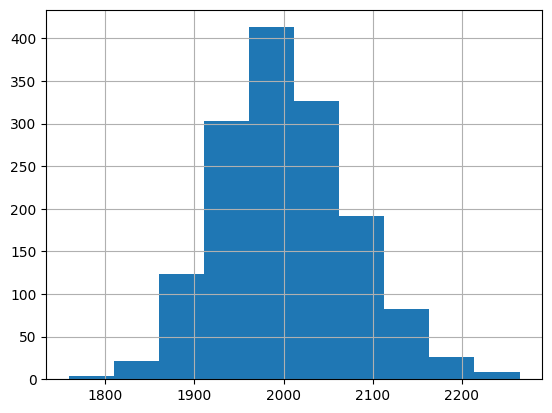

In [26]:
amostras.mean().hist()

"**E a média das médias amostrais também se aproxima da média da população**" 

In [27]:
# Média população
media_pop = data.Renda.mean()
media_pop

2000.3831988547631

In [28]:
# Média das médias amostrais
media_das_medias_amostrais = amostras.mean().mean()
media_das_medias_amostrais

2002.2532299999998

"E o desvio padrão das médias amostrais é proximo ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para **n** maior ou igual a **30**.

In [33]:
# Desvio padrão das medias amostrais
dp_medias_amostrais = amostras.mean().std(ddof=1)
dp_medias_amostrais

74.74412376672969

In [32]:
# Desvio padrão da população divido pela raiz quadrada do tamanho da amostra
dp_populacao = data.Renda.std(ddof=0) / n**0.5
dp_populacao

74.31272524675974

##  ✴️ Niveis de confiança e significança

O **nível de confiança** ($1 - \alpha$) é uma **medida da precisão** de uma **previsão** ou **inferência**. Ele é geralmente expresso como uma porcentagem e indica a probabilidade de que a previsão ou inferência esteja correta. Por exemplo, se você tem um nível de confiança de 95%, isso significa que você tem 95% de certeza de que a previsão ou inferência é correta. De forma complementar o **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa. Por exemplo, se você tem um nível de significância de 0,05, isso significa que há apenas 5% de chance de que o resultado observado seja devido ao acaso.

O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.

O **nível de confiança** de uma estimativa pode ser obtido a partir da área sob a curva normal como ilustrado na figura abaixo.

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img007.png)

##  ✴️ Erro inferêncial

O **erro inferencial** é definido pelo **desvio padrão das médias amostrais** $\sigma_\bar{x}$ vezes o **nível de confiança** determinado para o processo.


# $$e = z \frac{\sigma}{\sqrt{n}}$$

##  ✴️ Intervalo de confiança


#### Com desvio padrão populacional conhecido

## $\mu = \bar{x} \pm z\frac{\sigma}{\sqrt{n}}$

#### Com desvio padrão populacional desconhecido

## $\mu = \bar{x} \pm z\frac{s}{\sqrt{n}}$

##  ✴️ Exercicio

Suponha que os pesos dos sacos de arroz de uma indústria alimentícia se distribuem aproximadamente como uma normal de **desvio padrão populacional igual a 150 g**. Selecionada uma **amostra aleatório de 20 sacos** de um lote específico, obteve-se um **peso médio de 5.050 g**. Construa um intervalo de confiança para a **média populacional** assumindo um **nível de significância de 5%**.


### Solução manual

Calculando o **$Z$** da formula do intervlo de confiança

In [37]:
from scipy.stats import norm

nivel_significancia = 0.05
nivel_confiança = 1 - nivel_significancia

prob_Z = (nivel_confiança / 2) + 0.5
Z = norm.ppf(prob_Z)
print('O valor de Z é', Z)

O valor de Z é 1.959963984540054


Calculando o **desvio padrão das médias amostrais** **$\sigma_\bar{x}$**.

In [40]:
dp_populacao = 150
n = 20

dp_medias_amostrais = dp_populacao / n**0.5
print('O valor de 𝜎𝑥 é', dp_medias_amostrais)  

O valor de 𝜎𝑥 é 33.54101966249684


Calculando o **erro inferêncial** $e$.

In [42]:
erro_inferencial = Z * dp_medias_amostrais
print('O valor do erro inferencial é', erro_inferencial)

O valor do erro inferencial é 65.73919054324361


Calculando o intervalo de confiança.

In [44]:
media_amostral = 5050    # 5.050 g, cinco mil e cinquenta gramas
intervalo_confianca = (media_amostral-erro_inferencial, media_amostral+erro_inferencial)
print('O intervalo de confiança é:', intervalo_confianca)

O intervalo de confiança é: (4984.260809456757, 5115.739190543243)



### Solução usando o scipy

In [45]:
from scipy.stats import norm

In [47]:
intervalo_confianca = norm.interval(confidence=nivel_confiança, loc=media_amostral, scale=dp_medias_amostrais)
print('O intervalo de confiança é:', intervalo_confianca)

O intervalo de confiança é: (4984.260809456757, 5115.739190543243)


# 💠 Calculando o tamanho da amostra

A estudar